# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [3]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf

%matplotlib inline

In [4]:
dataset = get_dataset("/home/workspace/data/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86


## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [5]:
def display_images(batch):
    """
    This function takes a batch of images from the source dataset and shows images with bounding boxes
    """
    # ADD CODE HEREs
    colors = {1:"red", 2:"blue", 4:"green"} 
   
    width, height, channels = batch["image"].shape
   
    fig, ax = plt.subplots(figsize=(8,8))
   
    ax.imshow(batch["image"].numpy().astype("uint8"))
   
    gt_classes_list = batch["groundtruth_classes"].numpy()
   
    for item in range(len(batch["groundtruth_boxes"])):
        ymin, xmin, ymax, xmax = batch["groundtruth_boxes"][item]
        gt_class = gt_classes_list[item]
        
       
        rectangle = patches.Rectangle((xmin * width, ymin * height), (xmax-xmin) * width, (ymax-ymin) * height,
                                            edgecolor=colors[gt_class], facecolor="none") 
        
        ax.add_patch(rectangle)
       
    plt.show()
    
    

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

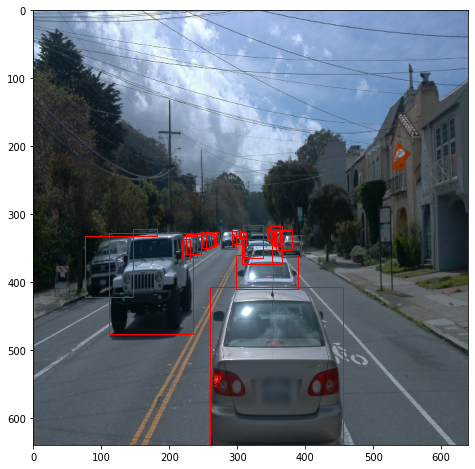

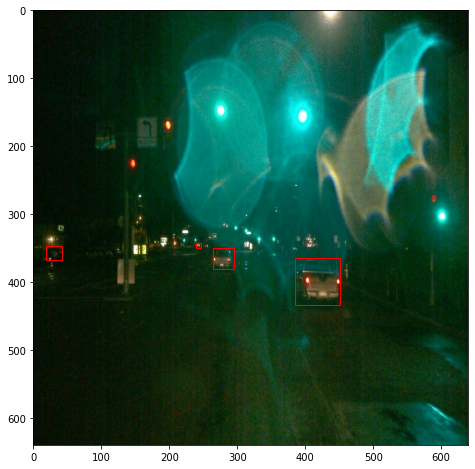

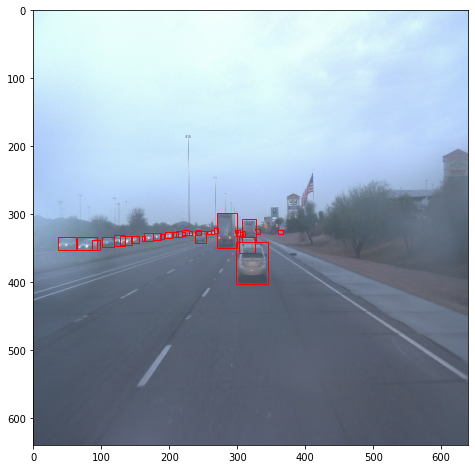

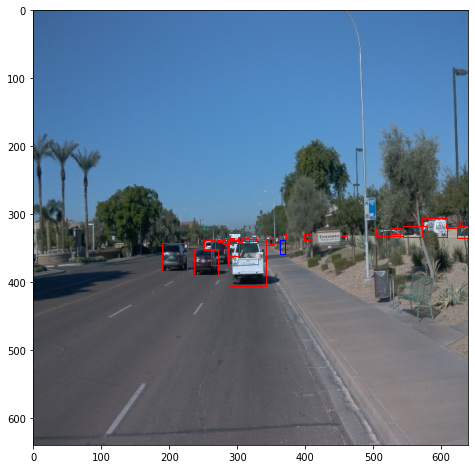

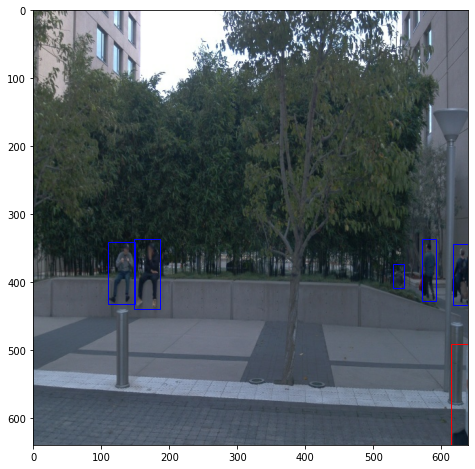

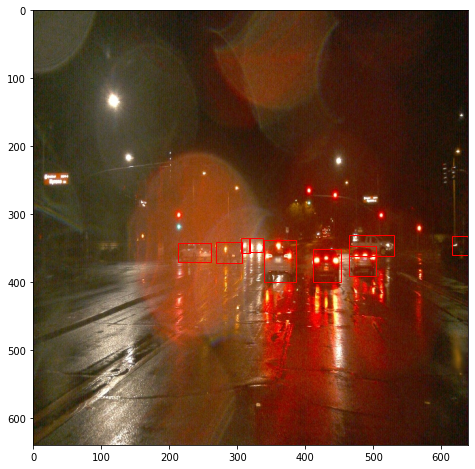

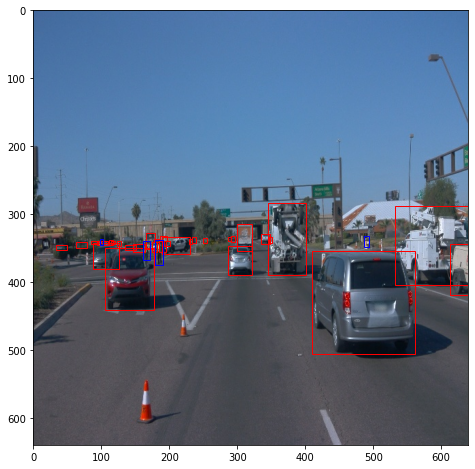

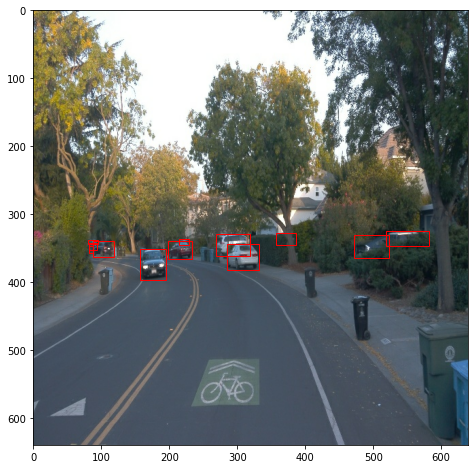

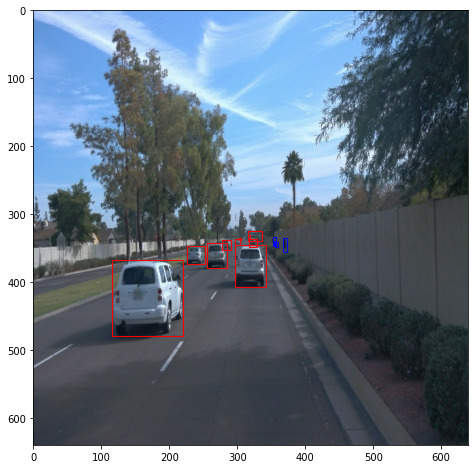

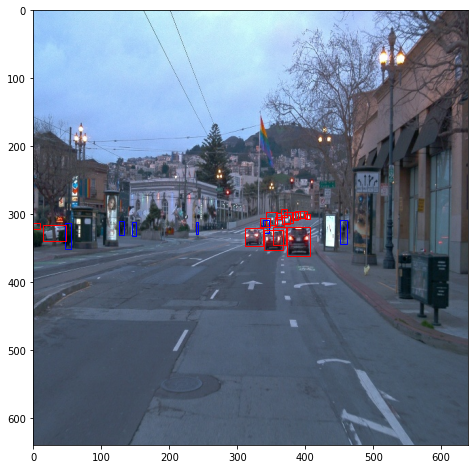

In [6]:
# Display 10 random images in dataset
shuffled_dataset = dataset.shuffle(100) # Sfuffle the data
display_dataset = shuffled_dataset.take(10) 

for images in display_dataset:
    display_images(images)
    

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [7]:
# Data Analysis

class_count = {1:0, 2:0, 4:0} 
for batch in dataset.take(12000):
    classes = batch['groundtruth_classes'].numpy()
    for classs in classes:
        class_count[classs] += 1

print('Our class distribution is: ', class_count)

Our class distribution is:  {1: 207518, 2: 58610, 4: 1489}


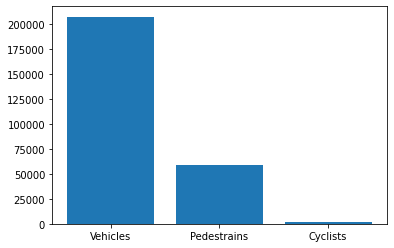

In [9]:
names = list(class_count.keys())
values = list(class_count.values())

plt.bar(range(len(class_count)), values, tick_label=['Vehicles','Pedestrains','Cyclists'])
plt.show()